In [1]:
import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, AveragePooling2D, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Define image parameters
img_height, img_width = 128, 128
batch_size = 32


# Define paths to your dataset directories
train_dir = '/Users/milind/Documents/try/Untitled Folder/dataset/Train'      # Replace with your training data directory
validation_dir = '/Users/milind/Documents/try/Untitled Folder/dataset/Test'  # Replace with your validation data directory


# Create ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=40,        # Randomly rotate images   
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill strategy for new pixels
)

# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that read images from the directories
train_generator_all = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 22233 images belonging to 14 classes.
Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
2025-05-04 12:05:34.620321: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-04 12:05:34.620397: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-05-04 12:05:34.620403: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1746340534.620815 43405830 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, d

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 14)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281,694 (4.89 MB)

 Trainable params: 1,281,694 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


2025-05-04 12:05:36.414412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


694/694 ━━━━━━━━━━━━━━━━━━━━ 317s 453ms/step - accuracy: 0.2042 - loss: 2.2352 - val_accuracy: 0.3679 - val_loss: 1.5658
Epoch 2/30
  1/694 ━━━━━━━━━━━━━━━━━━━━ 9:49 851ms/step - accuracy: 0.4375 - loss: 1.6958

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


694/694 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.4375 - loss: 1.6958 - val_accuracy: 0.4025 - val_loss: 1.5044
Epoch 3/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 143s 206ms/step - accuracy: 0.4544 - loss: 1.4278 - val_accuracy: 0.5908 - val_loss: 0.9965
Epoch 4/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.6875 - loss: 1.0907 - val_accuracy: 0.5610 - val_loss: 1.0431
Epoch 5/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 105s 150ms/step - accuracy: 0.5834 - loss: 1.1238 - val_accuracy: 0.6657 - val_loss: 0.8656
Epoch 6/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.7500 - loss: 0.8003 - val_accuracy: 0.6631 - val_loss: 0.8795
Epoch 7/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 114s 164ms/step - accuracy: 0.6513 - loss: 0.9638 - val_accuracy: 0.7258 - val_loss: 0.6803
Epoch 8/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.7500 - loss: 0.6124 - val_accuracy: 0.7155 - val_loss: 0.7101
Epoch 9/30
694/694 ━━━━━━━━━━━━━━━━━━━━ 107s 154ms/step - accuracy: 0.7112 - loss: 0.7925 - val

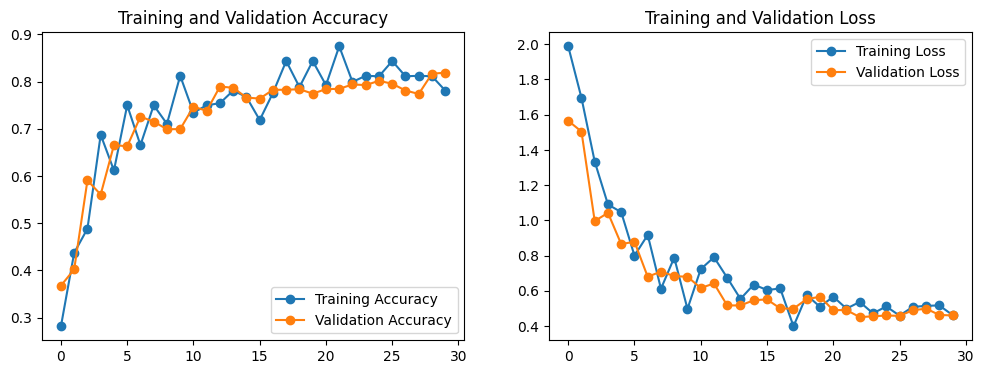

In [5]:
# Build the CNN model
model = Sequential([
    # First convolutional block
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dropout(0.3),
    
    # Output layer: number of neurons equals number of classes
    Dense(train_generator_all.num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Early stpping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    min_delta=0.001,  # Smallest change considered as improvement
    restore_best_weights=True
)


# Train the model
history = model.fit(
    train_generator_all,
    steps_per_epoch=train_generator_all.samples // batch_size,
    epochs=30,  # Increase the number of epochs for better results
    validation_data=validation_generator_all,
    validation_steps=validation_generator_all.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
model.save('saved_models/Basic_Complete_30.keras')# Evaluate the model
loss1, accuracy1 = model.evaluate(validation_generator_all)
print(f'Test Accuracy: {accuracy1 * 100:.2f}%')
print(f'Test loss: {loss1:.4f}')

248/248 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.7838 - loss: 0.4629
Test Accuracy: 79.39%
Test loss: 0.4521


In [12]:
validation_generator_all = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from sklearn.metrics import classification_report
import numpy as np

# Generate predictions
y_pred_probs = model.predict(validation_generator_all)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator_all.classes  # True labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=list(validation_generator_all.class_indices.keys())))

Found 7927 images belonging to 14 classes.


/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step
                precision    recall  f1-score   support

   freshapples       0.92      0.98      0.95       791
   freshbanana       0.98      0.99      0.99       892
 freshcucumber       0.00      0.00      0.00       279
     freshokra       0.42      0.99      0.59       370
  freshoranges       0.88      0.96      0.92       388
   freshpatato       1.00      0.08      0.14       487
    freshtamto       0.76      0.88      0.82       679
  rottenapples       0.94      0.92      0.93       988
  rottenbanana       0.99      0.97      0.98       900
rottencucumber       0.48      0.29      0.36       255
    rottenokra       0.00      0.00      0.00       224
 rottenoranges       0.98      0.83      0.90       403
  rottenpatato       0.52      0.99      0.68       630
   rottentamto       0.83      0.69      0.75       641

      accuracy                           0.79      7927
     macro avg       0.69      0.68      0.64      7927
  w

/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/milind/anaconda3/envs/gpu_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap